# SUPPORT VECTOR MACHINES

A Support Vector Machine (SVM) is a powerful and versatile Machine Learning model, **`capable of performing linear or nonlinear classification, regression, and even outlier detection`**. SVMs are particularly **`well suited for classification of complex small- or medium-sized datasets`**.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Linear SVM Classification

You can think of an SVM classifier as fitting the widest possible street (represented by the parallel dashed lines) between the classes. This is called `large margin classification`.

The next few code cells generate the first figures in chapter 5. The first actual code sample comes after:

In [2]:
from sklearn.svm import SVC
from sklearn import datasets

In [107]:
iris = datasets.load_iris()
X = iris['data'][:, (2, 3)]
y = iris['target']

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [46]:
type(iris), type(X), type(y)

(sklearn.utils.Bunch, numpy.ndarray, numpy.ndarray)

In [47]:
X.shape, y.shape

((100, 2), (100,))

In [108]:
svm_clf = SVC(kernel='linear', C=float('inf'))
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

In [52]:
svm_clf.coef_, svm_clf.intercept_

(array([[1.29411744, 0.82352928]]), array([-3.78823471]))

Saving figure large_margin_classification_plot


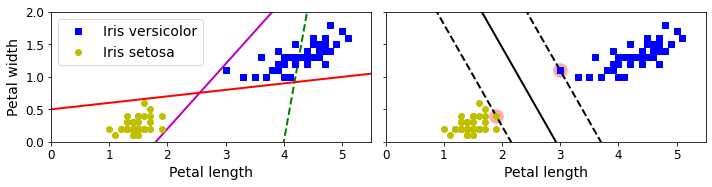

In [109]:
# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

save_fig("large_margin_classification_plot")
plt.show()

From above figure: Notice that adding more training instances “off the street” will not affect the decision boundary at all: it is fully determined (or “supported”) by the instances located on the edge of the street. These instances are called the `support vectors`.

### Sensitivity to feature scales

# Warning

> SVMs are sensitive to the feature scales, as you can see in Figure below: in the left plot, the vertical scale is much larger than the horizontal scale, so the widest possible street is close to horizontal. After feature scaling (e.g., using Scikit-Learn’s `StandardScaler`), the decision boundary in the right plot looks much better.

Saving figure sensitivity_to_feature_scales_plot


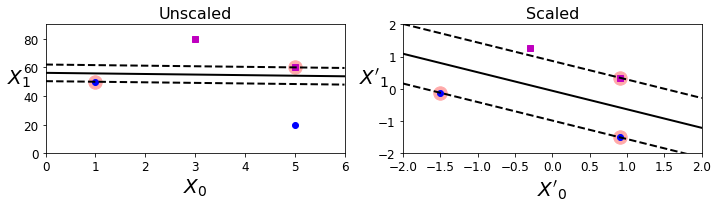

In [110]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]])
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel='linear', C=float('inf'))
svm_clf.fit(Xs, ys)

w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]
x0 = np.linspace(0, 5, 50)
decision_boundry = -w[0]/w[1] * x0 - b/w[1]
margin = 1/w[1]
gutter_up = decision_boundry + margin
gutter_down = decision_boundry - margin

# fig, axes = plt.subplots(ncols=2, figsize=(10, 3), sharey=True)
plt.figure(figsize=(10, 3))
plt.subplot(121)
plt.plot(Xs[:, 0][ys == 0], Xs[:, 1][ys == 0], 'bo')
plt.plot(Xs[:, 0][ys == 1], Xs[:, 1][ys == 1], 'ms')
# plt.plot(x0, decision_boundry, 'k-', linewidth=2)
# plt.plot(x0, gutter_up, 'k--', linewidth=2)
# plt.plot(x0, gutter_down, 'k--', linewidth=2)
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel('$X_0$', fontsize=20)
plt.ylabel('$X_1$', rotation=0, fontsize=20)
plt.title('Unscaled', fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys == 0], X_scaled[:, 1][ys == 0], 'bo')
plt.plot(X_scaled[:, 0][ys == 1], X_scaled[:, 1][ys == 1], 'ms')
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$X'_0$", fontsize=20)
plt.ylabel("$X'_1$", rotation=0, fontsize=20)
plt.title('Scaled', fontsize=16)
plt.axis([-2, 2, -2, 2])
# plt.show()
save_fig("sensitivity_to_feature_scales_plot")

In [111]:
svm_clf.intercept_, svm_clf.coef_

(array([0.06246103]), array([[0.62225468, 1.0825318 ]]))

## Soft Margin Classification

If we strictly impose that all instances must be off the street and on the right side, this is called `hard margin classification.` <br>

There are **two main issues** with hard margin classification:
* First, it only works if the data is linearly separable.
* Second, it is sensitive to outliers.

### Sensitivity to Outliers

Below fig shows the iris dataset with just one additional outlier: on the left, it is impossible to find a hard margin; on the right, the decision boundary ends up very different from the one we saw in 1st Figure without the outlier, and it will probably not generalize as well.

Saving figure sensitivity_to_outliers_plot


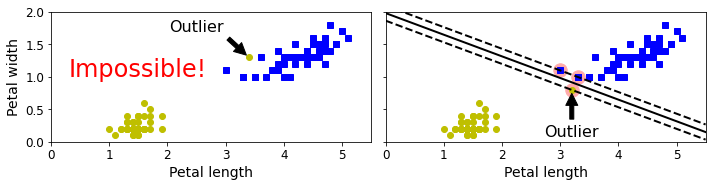

In [114]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=float('inf'))
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

save_fig("sensitivity_to_outliers_plot")
plt.show()

To avoid these issues, use a more flexible model. The objective is to find a `good balance between keeping the street as large as possible and limiting the margin violations` (i.e., instances that end up in the middle of the street or even on the wrong side). This is called **`soft margin classification`**.

When creating an SVM model using Scikit-Learn, we can specify a number of hyperparameters. <br>
$C$ is one of those hyperparameters. If we set it to a low value, then we end up with the model on the left of Figure below. With a high value, we get the model on the right. Margin violations are bad. It’s usually better to have few of them. However, in this case the model on the left has a lot of margin violations but will probably generalize better.

The following Scikit-Learn code loads the iris dataset, scales the features, and then trains a linear SVM model (using the `LinearSVC` class with $C=1$ and the `hinge loss` function, described shortly) to detect Iris virginica flowers:

In [117]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris['data'][:, (2, 3)] # petal length and petal width
y = (iris['target'] == 2).astype(np.float64) # Iris virginica

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge')),
])
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [118]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

Now let's generate the graph comparing different regularization settings:

In [190]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, random_state=42, loss='hinge')
svm_clf2 = LinearSVC(C=100, random_state=42, loss='hinge')

scaled_svm_clf1 = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_clf', svm_clf1),
])
scaled_svm_clf2 = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_clf', svm_clf2),
])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

/home/owl/Documents/venv/tlfMaths3.6/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_clf',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

In [194]:
scaled_svm_clf1['scaler'].mean_, scaled_svm_clf1['scaler'].scale_

(array([3.758     , 1.19933333]), array([1.75940407, 0.75969263]))

In [191]:
# Convert to unscaled parameters
scaler = scaled_svm_clf1['scaler']
b1 = scaled_svm_clf1['linear_clf'].decision_function([-scaler.mean_ / scaler.scale_])
w1 = scaled_svm_clf1['linear_clf'].coef_[0] / scaler.scale_
scaler = scaled_svm_clf2['scaler']
b2 = scaled_svm_clf2['linear_clf'].decision_function([-scaler.mean_ / scaler.scale_])
w2 = scaled_svm_clf2['linear_clf'].coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

Saving figure regularization_plot


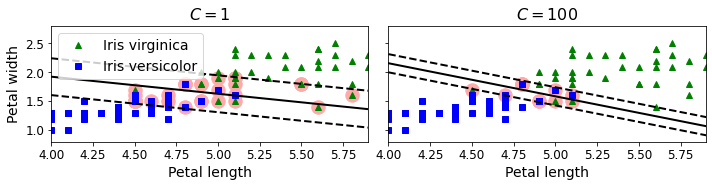

In [193]:
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

save_fig("regularization_plot")

# TIP 

> `If your SVM model is overfitting, you can try regularizing it by reducing` $C$.

# NOTE

> Unlike Logistic Regression classifiers, SVM classifiers do not output probabilites for each class

`Instead of using the LinearSVC class, we could use the SVC class with a linear kernel. When creating the SVC model, we would write SVC(kernel="linear", C=1). Or we could use the SGDClassifier class, with SGDClassifier(loss="hinge", alpha=1/(m*C)).` <br>
This applies regular Stochastic Gradient Descent (see Chapter 4) to train a linear SVM classifier. It does not converge as fast as the LinearSVC class, but **_`it can be useful to handle online classification tasks or huge datasets that do not fit in memory (out-of-core training).`_**

# TIP

> The `LinearSVC` class regularizes the bias term, so you should center the training set first by subtracting its mean. This is automatic if you scale the data using the `StandardScaler`. Also make sure you set the loss hyperparameter to "hinge", as it is not the default value. Finally, for better performance, you should set the `dual hyperparameter to False, unless there are more features than training instances` (we will discuss duality later in the chapter).

## Nonlinear SVM Classification

Although linear SVM classifiers are efficient and work surprisingly well in many cases, many datasets are not even close to being linearly separable. <br>
* One approach to handling nonlinear datasets is to add more features, such as polynomial features (as you did in Chapter 4); in some cases this can result in a linearly separable dataset. Consider the left plot in Figure below: it represents a simple dataset with just one feature, $x_1$. This dataset is not linearly separable, as you can see. But if you add a second feature $x_2 = (x_1)^2$, the resulting 2D dataset is perfectly linearly separable.

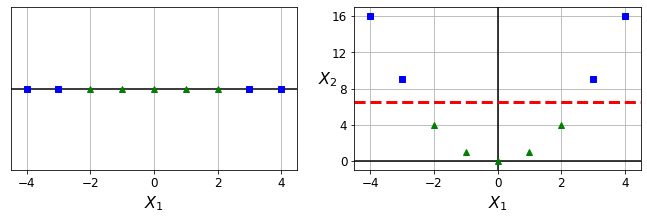

Saving figure higher_dimensions_plot


<Figure size 432x288 with 0 Axes>

In [220]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y == 0], np.zeros(4), 'bs')
plt.plot(X1D[:, 0][y == 1], np.zeros(5), 'g^')
plt.gca().get_yaxis().set_ticks([])
plt.xlabel('$X_1$', fontsize=16)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y == 0], X2D[:, 1][y == 0], 'bs')
plt.plot(X2D[:, 0][y == 1], X2D[:, 1][y == 1], 'g^')
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.ylabel('$X_2$', rotation=0, fontsize=16)
plt.xlabel('$X_1$', fontsize=16)
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)
plt.show()
save_fig("higher_dimensions_plot", tight_layout=False)

To implement this idea using Scikit-Learn, create a Pipeline containing a `PolynomialFeatures transformer` (discussed in “Polynomial Regression”), followed by a `StandardScaler` and a `LinearSVC`. <br>
Let’s test this on the moons dataset: this is a toy dataset for binary classification in which the data points are shaped as two interleaving half circles (see Figure below). You can generate this dataset using the `make_moons()` function:

In [222]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

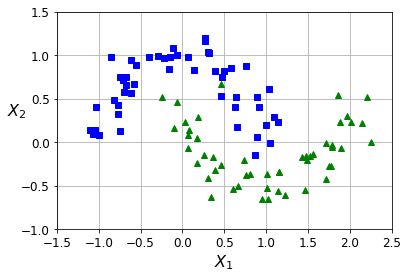

In [275]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'bs')
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'g^')
    plt.grid(True, which='both')
    plt.xlabel('$X_1$', fontsize=16)
    plt.ylabel("$X_2$", fontsize=16, rotation=0)
    plt.axis(axes)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [228]:
X, y = make_moons(n_samples=100, noise=0.15)
polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge')),
])

polynomial_svm_clf.fit(X, y)

/home/owl/Documents/venv/tlfMaths3.6/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [229]:
X.shape, y.shape

((100, 2), (100,))

In [230]:
np.unique(y)

array([0, 1])

In [231]:
X[:3]

array([[ 1.01411674, -0.36843238],
       [ 0.80909039, -0.36441603],
       [ 1.89913185, -0.06847189]])

Saving figure moons_polynomial_svc_plot


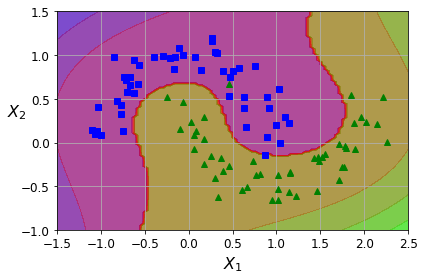

In [365]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.5)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.4)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

save_fig("moons_polynomial_svc_plot")
plt.show()

In [366]:
xpred = [55.0873127, 100]
polynomial_svm_clf.predict([xpred]), polynomial_svm_clf.decision_function([xpred])

(array([0]), array([-0.0003913]))

In [367]:
xpred = [0.5, 100]
polynomial_svm_clf.predict([xpred]), polynomial_svm_clf.decision_function([xpred])

(array([0]), array([-4698716.36422922]))

### Polynomial Kernel

`Adding polynomial features is simple to implement and can work great with all sorts of Machine Learning algorithms (not just SVMs). That said, at a low polynomial degree, this method cannot deal with very complex datasets, and with a high polynomial degree it creates a huge number of features, making the model too slow.`

Fortunately, when using SVMs you can apply an almost miraculous mathematical technique called the _`kernel trick`_ (explained in a moment). <br>
The kernel trick makes it possible to get the same result as if you had added many polynomial features, even with very high-degree polynomials, without actually having to add them. So there is no combinatorial explosion of the number of features because you don’t actually add any features. This trick is implemented by the SVC class. Let’s test it on the moons dataset:

In [345]:
from sklearn.svm import SVC

In [360]:
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(C=5, kernel='poly', degree=3, coef0=1)),
])

poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

This code trains an SVM classifier using a third-degree polynomial kernel. It is represented on the left in Figure below. On the right is another SVM classifier using a 10th-degree polynomial kernel. <br>
Obviously, **`if your model is overfitting, you might want to reduce the polynomial degree. Conversely, if it is underfitting, you can try increasing it. The hyperparameter coef0 controls how much the model is influenced by high-degree polynomials versus low-degree polynomials.`**

In [368]:
poly100_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(C=5, kernel='poly', degree=10, coef0=100)),
])

poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

Saving figure moons_kernelized_polynomial_svc_plot


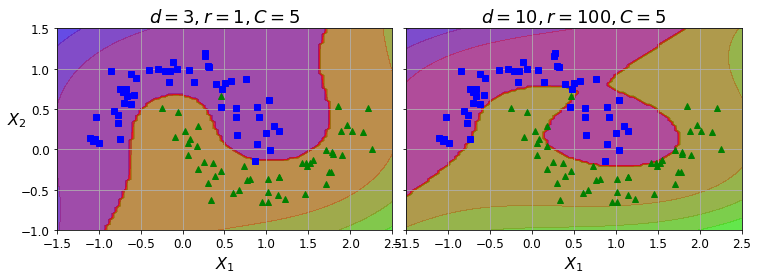

In [369]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title("$d = 3, r = 1, C = 5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title("$d = 10, r = 100, C = 5$", fontsize=18)
plt.ylabel("")

save_fig("moons_kernelized_polynomial_svc_plot")
plt.show()

# TIP

> A common approach to finding the right hyperparameter values is to use grid search (see Chapter 2). It is often faster to first do a very coarse grid search, then a finer grid search around the best values found. Having a good sense of what each hyperparameter actually does can also help you search in the right part of the hyperparameter space.

### Similarity Features